# Lab Assignment - 8

### SVM (Support Vector Machines)

- Name: Nijatullah Mansoor
- Ro No: 2047119


Demonstrate SVM using sklearn. Show the results on `complex non linear synthetic data`. Demonstrate 3 different kernels and significance of parameters C and Gamma. Demonstrate parameter tuning with GridsearchCV function


`In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.`


`SVM` works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

- Let's import Library first

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

# Load the data

In [3]:
x_c2, y_c2 = make_classification(n_samples = 500, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1,random_state=0)

In [4]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

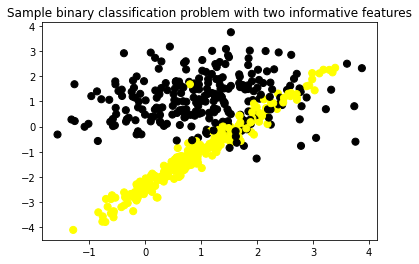

In [5]:
plt.title('Sample binary classification problem with two informative features')
plt.scatter(x_c2[:, 0], x_c2[:, 1], c=y_c2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

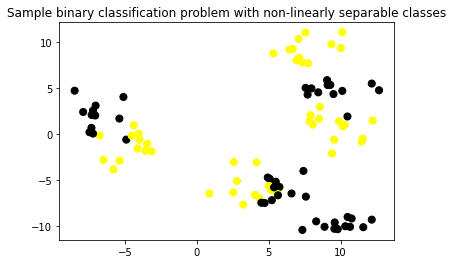

In [6]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [7]:
y_D2

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

In [9]:
X_D2

array([[ -7.35089746,   0.66563488],
       [  5.46802032,  -5.36275188],
       [  8.55164331,   2.95571811],
       [ 12.23096506,   1.45722876],
       [  5.74847262,  -5.74913641],
       [  6.65725625,   9.23712522],
       [ -5.40812491,   1.67549782],
       [  6.5809958 ,  -6.47473501],
       [ 12.67324661,   4.75436629],
       [ -7.49065357,   0.19162724],
       [  7.83673564,   1.40094128],
       [ -3.15338155,  -1.89052513],
       [  9.5645763 , -10.31242869],
       [  5.2092339 ,  -7.20456696],
       [ 11.57802562, -10.14473108],
       [ 11.54066181,  -0.50201082],
       [  0.86086864,  -6.46819889],
       [  5.06612857,  -4.88266282],
       [ -7.09137535,   2.01099838],
       [ -4.9278966 ,  -0.61660012],
       [ -5.82584571,  -3.85998849],
       [ -5.12517776,   4.02651965],
       [ -7.33761683,   2.07182721],
       [  9.28377117,   5.33903247],
       [  7.33763474, -10.43944719],
       [  7.96674906,   4.95921559],
       [ -4.14276034,  -1.57737288],
 

## For the second data

In [11]:
x_c2[:30]

array([[ 0.91515925, -1.23158162],
       [ 1.26674977,  1.89013499],
       [ 1.52820473,  3.75540878],
       [ 0.60231425, -1.19682332],
       [ 0.73115327,  0.6886865 ],
       [ 1.69723818,  0.47063429],
       [-0.21779506, -3.36824395],
       [-0.5305393 ,  0.74459252],
       [-0.20356643,  1.5480862 ],
       [ 0.54503761,  1.79993549],
       [ 0.00473743,  1.0421632 ],
       [ 0.21385083, -2.12386591],
       [ 2.13722836,  0.54342795],
       [ 0.46739157, -1.40052335],
       [ 0.95999085,  1.91748087],
       [ 2.75922885,  0.28541056],
       [ 2.70776119,  1.06650487],
       [-0.22812026,  1.19240271],
       [ 0.72174443,  2.59837929],
       [ 1.22021371,  1.01166618],
       [ 0.86469226, -0.77820226],
       [ 1.88506596,  0.10589995],
       [-0.5715803 , -3.46515957],
       [ 0.26178303,  0.4631988 ],
       [ 1.47772653,  2.83710255],
       [ 1.04092674, -0.88813432],
       [ 1.23561379, -0.45688641],
       [ 0.2688692 ,  0.15700601],
       [ 3.22549525,

In [12]:
y_c2

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [13]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

In [18]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x_c2, y_c2, random_state = 0)


this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(x_train, y_train)


print('Second Dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Second Dataset
Accuracy of Linear SVC classifier on training set: 0.89
Accuracy of Linear SVC classifier on test set: 0.86


## Kernel Parameter - C Values

Simply speaking, the C parameter is a regularization parameter used to set the tolerance of the model to allow the misclassification of data points in order to achieve lower generalization error. Higher the value of C, lesser is the tolerance and what is trained is a maximum-margin classifier. Smaller the value of C, larger is the tolerance of misclassification and what gets trained is a soft-margin classifier that generalizes better than maximum-margin classifier. The C value controls the penalty of misclassification. A large value of C would result in a higher penalty for misclassification and a smaller value of C will result in a smaller penalty of misclassification. With a larger value of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. The model may overfit with the training dataset. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 

for more visit this 

https://dzone.com/articles/using-jsonb-in-postgresql-how-to-effectively-store-1

## 3 different kernels and significance of parameters C and Gamma

In [19]:
clf = SVC(kernel = 'rbf',gamma = 0.1).fit(x_train, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.88
Accuracy of Linear SVC classifier on test set: 0.84


# Let's change the C and Gamma parameters.

In [20]:
clf = SVC(kernel = 'rbf',gamma = 0.1,C=0.02).fit(x_train, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.86
Accuracy of Linear SVC classifier on test set: 0.82


Let's take a look at different values of C and the related decision boundaries when the SVM model gets trained using RBF kernel (kernel = "rbf"). 

Note the value of gamma is set to 0.1 and the kernel = 'rbf'.

In [21]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=0.04)
svm.fit(x_train, y_train)

SVC(C=0.04, gamma=0.1, random_state=1)

In [22]:
svm.score(x_test,y_test)

0.832

## Conclusion

- Gamma and C values are key hyperparameters that can be used to train the most optimal SVM model using RBF kernel.
- The gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'
- Higher value of gamma will mean that radius of influence is limited to only support vectors. This would essentially mean that the model tries and overfit. The model accuracy lowers with the increasing value of gamma.
- The lower value of gamma will mean that the data points have very high radius of influence. This would also result in model having lower accuracy.
- It is the intermediate value of gamma which results in a model with optimal accuracy.
- The C parameter determines how tolerant is the model towards misclassification.
- Higher value of C will result in model which has very high accuracy but which may fail to generalize.
- The lower value of C will result in a model with very low accuracy.

# Use GridsearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC and creates a new estimator, that behaves exactly the same – in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, the higher the number, the more verbose (verbose just means the text output describing the process).

In [23]:
from sklearn.model_selection import GridSearchCV


In [25]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

What fit does is a bit more involved than usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to build a single new model using the best parameter setting.
You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute: 

In [26]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


Then you can re-run predictions and see a classification report on this grid object just like you would with a normal model.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        64
           1       0.93      0.89      0.91        61

    accuracy                           0.91       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125

